In [1]:
from pref_voting.dominance_axioms import condorcet_winner, condorcet_loser, pareto_dominance

from pref_voting.voting_methods import *
from pref_voting.generate_profiles import *
from pref_voting.voting_methods_registry import voting_methods
from pref_voting.helper import *

In [5]:
print(len(list(voting_methods)))

73


In [2]:
voting_methods.display_methods()

Anti-Plurality (Scoring Rule)
Satisfied properties: []
Violated properties: ['condorcet_winner', 'condorcet_loser', 'pareto_dominance']

Borda (Combined Method)
Satisfied properties: ['condorcet_loser', 'pareto_dominance']
Violated properties: ['condorcet_winner']

Borda (for Truncated Profiles) (Scoring Rule)
Satisfied properties: []
Violated properties: []

Dowdall (Scoring Rule)
Satisfied properties: ['pareto_dominance']
Violated properties: ['condorcet_winner', 'condorcet_loser']

Plurality (Other Method)
Satisfied properties: ['pareto_dominance']
Violated properties: ['condorcet_winner', 'condorcet_loser']

Positive-Negative Voting (Scoring Rule)
Satisfied properties: []
Violated properties: ['condorcet_winner', 'condorcet_loser', 'pareto_dominance']

Alternative Vote (Iterative Method)
Satisfied properties: ['pareto_dominance']
Violated properties: ['condorcet_winner', 'condorcet_loser']

Baldwin (Iterative Method)
Satisfied properties: ['condorcet_winner', 'condorcet_loser', 'pa

In [3]:
prof = generate_profile(4, 5)
for vm in voting_methods:
    print(vm)
    if ElectionTypes.PROFILE in vm.input_types:
        vm.display(prof)

Anti-Plurality
Anti-Plurality winners are {1, 2, 3}
Borda
Borda winner is {1}
Borda (for Truncated Profiles)
Dowdall
Dowdall winner is {1}
Plurality
Plurality winners are {0, 1}
Positive-Negative Voting
Positive-Negative Voting winner is {1}
Alternative Vote
Alternative Vote winner is {1}
Baldwin
Baldwin winner is {1}
Baldwin PUT
Baldwin PUT winner is {1}
Baldwin TB
Baldwin TB winner is {1}
Benham
Benham winner is {1}
Benham PUT
Benham PUT winner is {1}
Benham TB
Benham TB winner is {1}
Bottom-Two-Runoff Instant Runoff
Bottom-Two-Runoff Instant Runoff winner is {1}
Bottom-Two-Runoff Instant Runoff PUT
Bottom-Two-Runoff Instant Runoff PUT winner is {1}
Coombs
Coombs winner is {1}
Coombs PUT
Coombs PUT winner is {1}
Coombs TB
Coombs TB winner is {1}
GOCHA
GOCHA winner is {1}
Hare
Hare winner is {1}
Hare PUT
Hare PUT winner is {1}
Instant Runoff
Instant Runoff PUT
Instant Runoff PUT winner is {1}
Instant Runoff TB
Instant Runoff TB winner is {1}
Iterated Removal Condorcet Loser
Iterated R

In [25]:

for t in range(10000): 
    prof = generate_profile(10, 100)
    if pareto_dominance.has_violation(prof,superior_voting, verbose=True): 
        print(prof)
        break


In [34]:
from pref_voting.swf_axioms import *

In [6]:
R=0
D=1
P=2
prof = Profile([
    [R, D, P],
    [P, D, R],
    [D, P, R]
], 
[40, 35, 25],
)

prof.display()

plurality.display(prof)
instant_runoff.display(prof)
split_cycle.display(prof)

sc_ranking = swf_from_vm(split_cycle)

@swf("DPR")
def dpr(profile, curr_cands=None):
    return Ranking({D: 1, P: 2, R: 3})
@swf("DRP")
def drp(profile, curr_cands=None):
    return Ranking({D: 1, P: 3, R: 2})
@swf("RPD")
def rpd(profile, curr_cands=None):
    return Ranking({D: 3, P: 2, R: 1})
@swf("RDP")
def rdp(profile, curr_cands=None):
    return Ranking({D: 2, P: 3, R: 1})
@swf("PDR")
def pdr(profile, curr_cands=None):
    return Ranking({D: 2, P: 1, R: 3})
@swf("PRD")
def prd(profile, curr_cands=None):
    return Ranking({D: 3, P: 1, R: 2})


+----+----+----+
| 40 | 35 | 25 |
+----+----+----+
| 0  | 2  | 1  |
| 1  | 1  | 2  |
| 2  | 0  | 0  |
+----+----+----+
Plurality winner is {0}
Instant Runoff winner is {2}
Split Cycle winner is {1}


In [7]:
instant_runoff_ranking.display(prof)

irv_swf2 = swf_from_vm(instant_runoff)
irv_swf2.display(prof)

Instant Runoff Ranking ranking is 2 0 1 
SWF from Instant Runoff ranking is 2 1 0 


Core support violation by PDR for 1 relative to 0:
+----+----+----+
| 40 | 35 | 25 |
+----+----+----+
| 0  | 2  | 1  |
| 1  | 1  | 2  |
| 2  | 0  | 0  |
+----+----+----+


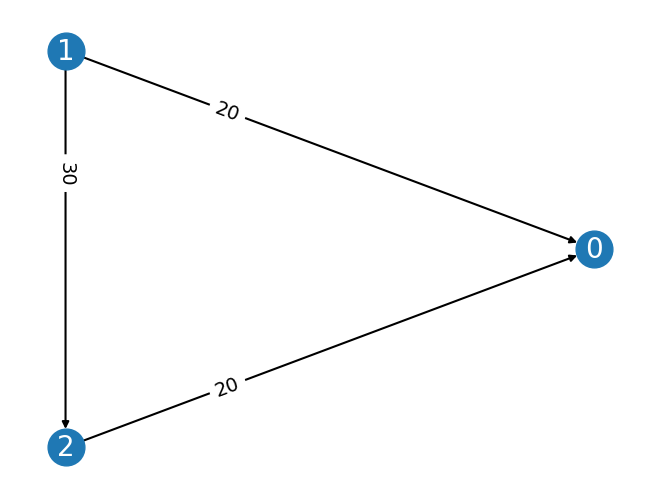

Social ranking: 2 1 0 
Major candidates relative to 0: [0, 1, 2]
Profile restricted to voters in core support for 1 relative to 0 and for 0 relative to 0:
+----+----+
| 25 | 40 |
+----+----+
| 1  | 0  |
| 2  | 1  |
| 0  | 2  |
+----+----+


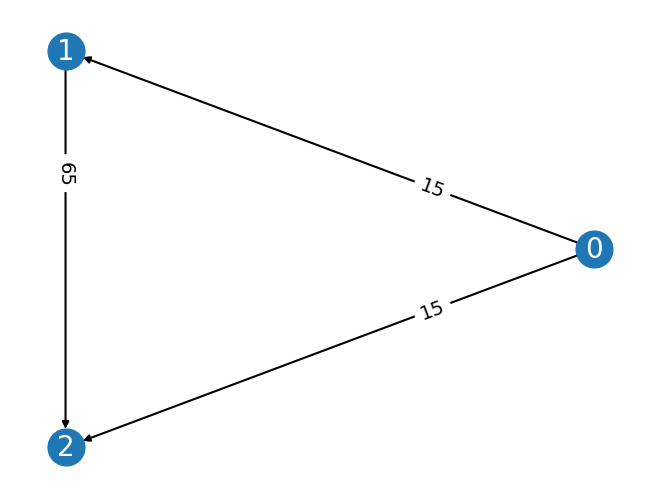

Core support violation by PDR for 2 relative to 0:
+----+----+----+
| 40 | 35 | 25 |
+----+----+----+
| 0  | 2  | 1  |
| 1  | 1  | 2  |
| 2  | 0  | 0  |
+----+----+----+


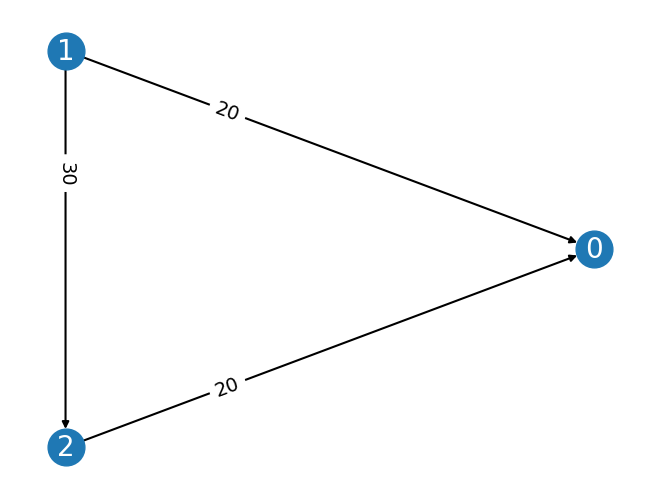

Social ranking: 2 1 0 
Major candidates relative to 0: [0, 1, 2]
Profile restricted to voters in core support for 2 relative to 0 and for 0 relative to 0:
+----+----+
| 35 | 40 |
+----+----+
| 2  | 0  |
| 1  | 1  |
| 0  | 2  |
+----+----+


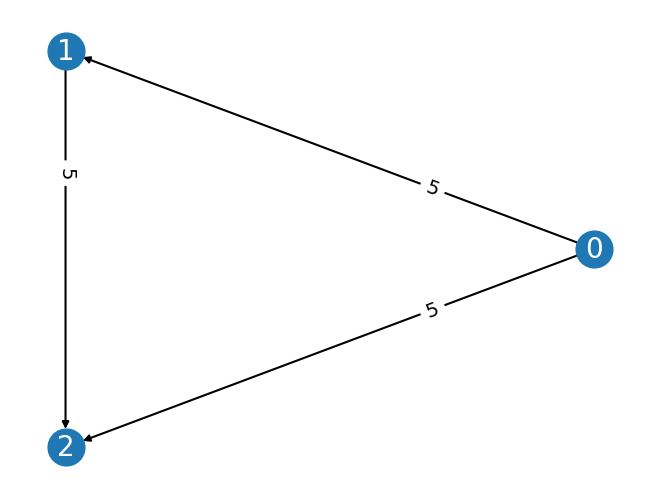

Core support violation by PDR for 2 relative to 1:
+----+----+----+
| 40 | 35 | 25 |
+----+----+----+
| 0  | 2  | 1  |
| 1  | 1  | 2  |
| 2  | 0  | 0  |
+----+----+----+


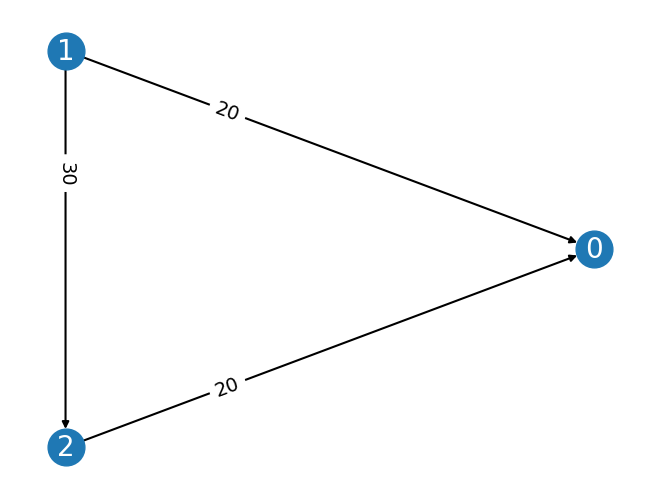

Social ranking: 2 1 0 
Major candidates relative to 1: [1, 2]
Profile restricted to voters in core support for 2 relative to 1 and for 1 relative to 1:
+----+----+----+
| 35 | 40 | 25 |
+----+----+----+
| 2  | 0  | 1  |
| 1  | 1  | 2  |
| 0  | 2  | 0  |
+----+----+----+


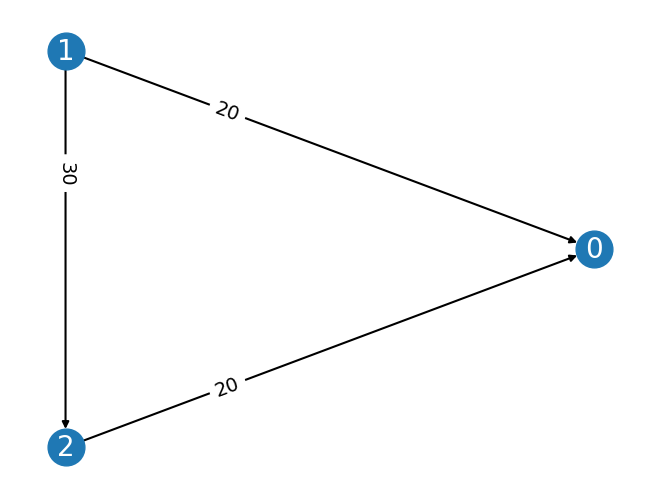

[(1, 0), (2, 0), (2, 1)]

In [10]:
core_support.find_all_violations(prof.anonymize(),pdr, verbose=True)

Core support violation by DRP for 1 relative to 2:
+----+----+----+
| 40 | 35 | 25 |
+----+----+----+
| 0  | 2  | 1  |
| 1  | 1  | 2  |
| 2  | 0  | 0  |
+----+----+----+


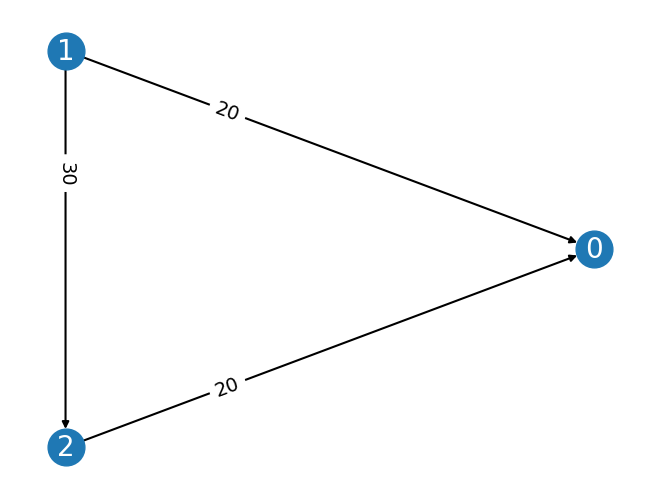

Social ranking: 1 0 2 
Major candidates relative to 2: [0, 1, 2]
Profile restricted to voters in core support for 1 relative to 2 and for 2 relative to 2:
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 2 | 2 | 2 | 2 | 2

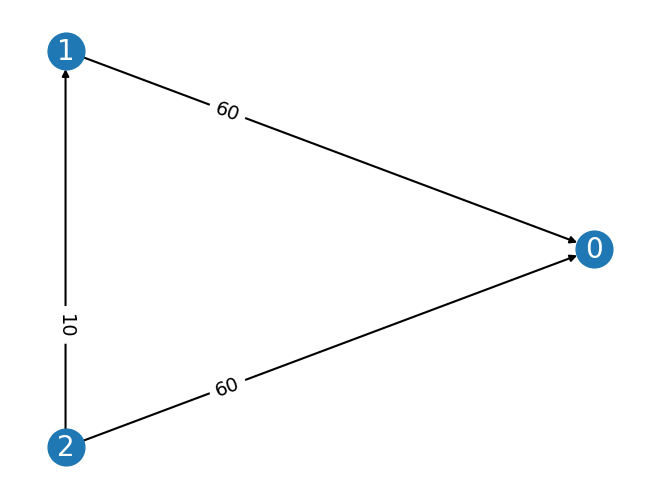

True

In [37]:
core_support.has_violation(prof.anonymize(),drp, verbose=True)